LGMVIP - Data Science (April 2022)

NAME : SHREYAS KSHIRSAGAR

Task 7) Develop A Neural Network That Can Read Handwritting

Dataset Link : http://en.wikipedia.org/wiki/MNIST_database

Import these libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist

In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


### Load the Data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

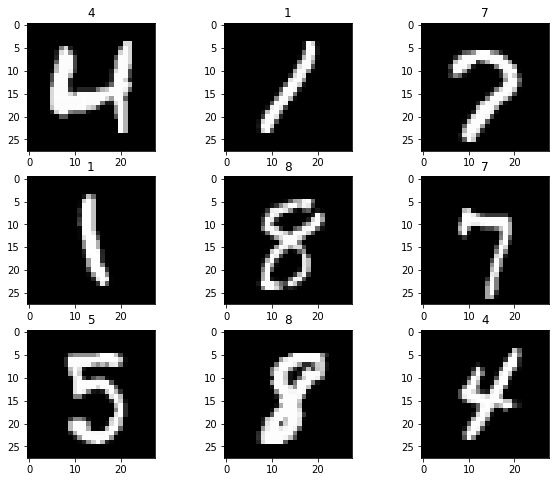

In [ ]:
plt.figure(figsize=(10, 8))
np.random.seed(0)
idx = np.random.randint(0, 60000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(X_train[idx[i]], (28,28))
    plt.imshow(grid_data, cmap='gray')

# Data Preprocessing

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
print("Class label of first image :", y_train[0])
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)
print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Building the Model

In [ ]:
model = None
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=20)

Epoch 1/20
469/469 [==============================] - 18s 16ms/step - loss: 0.2862 - accuracy: 0.9143
Epoch 2/20
469/469 [==============================] - 7s 16ms/step - loss: 0.1066 - accuracy: 0.9688
Epoch 3/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0787 - accuracy: 0.9766
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0653 - accuracy: 0.9803
Epoch 5/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0548 - accuracy: 0.9824
Epoch 6/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0478 - accuracy: 0.9847
Epoch 7/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0409 - accuracy: 0.9865
Epoch 8/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0388 - accuracy: 0.9878
Epoch 9/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0331 - accuracy: 0.9890
Epoch 10/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0311 - accur

In [ ]:
prediction_score = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [0.03225725516676903, 0.9919999837875366]


In [ ]:
from keras.preprocessing import image

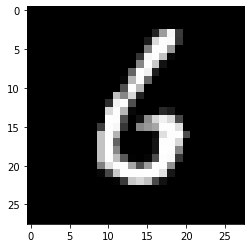

In [ ]:
plt.imshow(image.array_to_img(X_test[50]), cmap="gray")

In [ ]:
y_test[50]

6

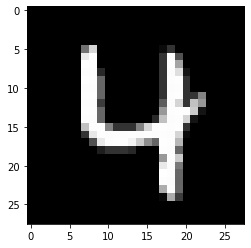

In [ ]:
plt.imshow(image.array_to_img(X_test[49]), cmap="gray")

In [ ]:
y_test[49]

4

0

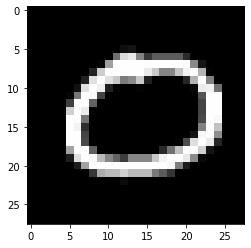

In [ ]:
plt.imshow(image.array_to_img(X_test[69]), cmap="gray")
y_test[69]

In [ ]:
y_test[69]

0